## Supervised Learning - Building a Student Performace Prediction System  

## Question 1 - Classification vs. Regression

*The aim of this project is to predict how likely a student is to pass. Which type of supervised learning problem is this, classification or regression? Why?*

#### Answer:


This is a classification problem since we want to predict discrete categories (Pass or not pass) 
while in regression we predict continuous values

### Overview:

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Transform the dataset for building machine learning model.

6.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Provide insights.

## Problem Statement 

Using Logistic Regression **predict the performance of student**. The classification goal is to predict whether the student will pass or fail.

## Dataset 

This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in Mathematics.

**Source:** https://archive.ics.uci.edu/ml/datasets/Student+Performance


In [1]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Numerical libraries
import numpy as np   

# Import Linear Regression machine learning library
from sklearn.linear_model import LinearRegression

# to handle data in form of rows and columns 
import pandas as pd    

# importing ploting libraries
import matplotlib.pyplot as plt   
import matplotlib.style
#plt.style.use('classic')

#importing seaborn for statistical plots
import seaborn as sns

from sklearn.model_selection import train_test_split

## Question 2 - Exploring the Data
*Read the dataset file using pandas. Take care about the delimiter.*

#### Answer:

In [7]:
stdata = pd.read_csv('students-data.csv', delimiter = ';')
stdata.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


## Question 3 - drop missing values
*Set the index name of the dataframe to **"number"**. Check sample of data to drop if any missing values are there.*

#### Answer:

In [8]:
stdata.index.name = 'number'
stdata.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,,
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [130]:
stdata[stdata.isnull().any(axis=1)]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,,


## Transform Data

## Question 4

*Print all the attribute names which are not numerical.*

**Hint:** check **select_dtypes()** and its **include** and **exclude** parameters.**

#### Answer:

In [16]:
df = stdata.select_dtypes(exclude = 'int')
df.dtypes

school        object
sex           object
address       object
famsize       object
Pstatus       object
Mjob          object
Fjob          object
reason        object
guardian      object
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
dtype: object

In [14]:
df2 = stdata.select_dtypes(include = 'int')
df2.dtypes

age           int64
Medu          int64
Fedu          int64
traveltime    int64
studytime     int64
failures      int64
famrel        int64
freetime      int64
goout         int64
Dalc          int64
Walc          int64
health        int64
absences      int64
G1            int64
G2            int64
G3            int64
dtype: object

## Question 5 - Drop variables with less variance

*Find the variance of each numerical independent variable and drop whose variance is less than 1.*

#### Answer:

In [124]:
df2_dep = df2[['G1','G2','G3']]
df2_ind = df2.drop(['G1','G2','G3'], axis=1)
df2_ind.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences
number,,,,,,,,,,,,,
0,18,4,4,2,2,0,4,3,4,1,1,3,6
1,17,1,1,1,2,0,5,3,3,1,1,3,4
2,15,1,1,1,2,3,4,3,2,2,3,3,10
3,15,4,2,1,3,0,3,2,2,1,1,5,2
4,16,3,3,1,2,0,4,3,2,1,2,5,4


In [101]:
bool = df2_ind.var()>=1
df3 = df2_ind.loc[:,bool.values]
df3.head()

,age,Medu,Fedu,goout,Walc,health,absences
number,,,,,,,
0,18,4,4,4,1,3,6
1,17,1,1,3,1,3,4
2,15,1,1,2,3,3,10
3,15,4,2,2,1,5,2
4,16,3,3,2,2,5,4


#### Variables with less variance are almost same for all the records. Hence, they do not contribute much for classification.

## Question 6 - Encode all categorical variables to numerical

Take the list of categorical attributes(from the above result) and convert them into neumerical variables. After that, print the head of dataframe and check the values.

**Hint:** check **sklearn LabelEncoder()**

#### Answer:

In [105]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

df = df.apply(encoder.fit_transform, axis=1)
df.head()

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
number,,,,,,,,,,,,,,,,,
0,2,1,4,3,0,5,9,6,7,10,8,8,8,10,10,8,8
1,1,0,4,2,3,5,9,6,7,8,10,8,8,8,10,10,8
2,1,0,4,2,3,5,8,8,6,9,7,9,7,9,9,9,7
3,1,0,4,2,3,5,9,6,7,8,10,10,10,10,10,10,10
4,1,0,4,2,3,8,8,6,5,7,9,9,7,9,9,7,7


## Question 7 - Convert the continuous values of grades into classes

*Consider the values in G1, G2 and G3 with >= 10 as pass(1) and < 10 as fail(0) and encode them into binary values. Print head of dataframe to check the values.*

#### Answer:

In [128]:
df2_dep = df2_dep>=10
df2_dep = df2_dep.astype(int)


,G1,G2,G3
number,,,
0,0,0,0
1,0,0,0
2,0,0,1
3,1,1,1
4,0,1,1


In [129]:
stdata1 = pd.concat([pd.DataFrame(df),pd.DataFrame(df3),pd.DataFrame(df2_dep)],axis=1)
stdata1.head()

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,...,age,Medu,Fedu,goout,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,,
0,2,1,4,3,0,5,9,6,7,10,...,18,4,4,4,1,3,6,0,0,0
1,1,0,4,2,3,5,9,6,7,8,...,17,1,1,3,1,3,4,0,0,0
2,1,0,4,2,3,5,8,8,6,9,...,15,1,1,2,3,3,10,0,0,1
3,1,0,4,2,3,5,9,6,7,8,...,15,4,2,2,1,5,2,1,1,1
4,1,0,4,2,3,8,8,6,5,7,...,16,3,3,2,2,5,4,0,1,1


## Question 8 

*Consider G3 is the target attribute and remaining all attributes as features to predict G3. Now, separate feature and target attributes into separate dataframes with X and y variable names.*

#### Answer:

In [132]:
y = stdata1['G3']
X = stdata1.drop(['G3'], axis=1)


## Question 9 - Analysis on given dataset 
Determine the following stats.

1) How many student's information is given?

2) How many features are given for each student?

3) How many students passed?

4) How many students failed?

5) Whats the rate of graduation?

#### Answer:


In [143]:
# number of students
len(stdata1)

395

In [144]:
len(stdata1.columns) #number of features in trimmed dataset. 
#len(stdata.columns) will give number of features in original dataset

27

In [147]:
#number of students passed
len(stdata1[stdata1['G3']==1])

265

In [148]:
#number of students failed
len(stdata1[stdata1['G3']==0])

130

In [289]:
# rate of graduation
265*100/395

67.0886075949367

## Visualization

## Question 10

*Plot G2 and G3 and give your understanding on relation between both variables.*

#### Answer:

Text(0,0.5,'G3 Grades')

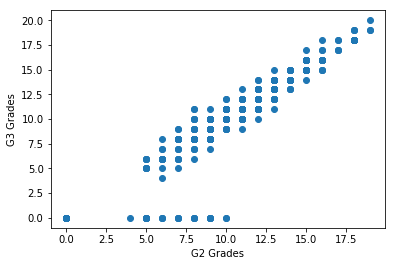

In [152]:
plt.scatter(stdata['G2'],stdata['G3'])
plt.xlabel('G2 Grades')
plt.ylabel('G3 Grades')


The G3 depends a great deal on the G2. Thus, the G2 can be a good predictor of the outcome variable.


## Question 11

*Plot the number of students in each school and number of students with different ages in separate plots.*

#### Answer:

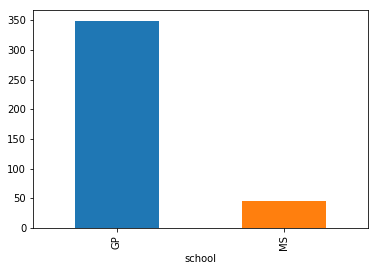

In [162]:
gpdata = stdata.groupby('school').size()
gpdata.plot(kind='bar')

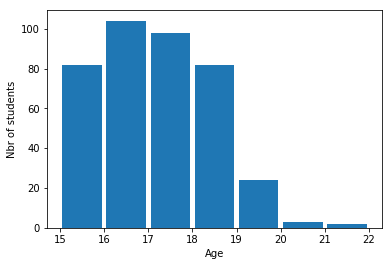

In [185]:
plt.hist(stdata.age, bins=range(stdata['age'].min(), stdata['age'].max()+1), rwidth=0.9)
plt.xlabel('Age')
plt.ylabel('Nbr of students')

plt.show()

## Question 12 - Training and testing data split

*So far, you have converted all categorical features into numeric values. Now, split the data into training and test sets with training size of 300 records. Print the number of train and test records.*

**Hint:** check **train_test_split()** from **sklearn**

#### Answer:

In [187]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [207]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(316, 26)
(316,)
(79, 26)
(79,)


In [208]:
y_train = y_train.reshape(len(y_train),1)
y_test = y_test.reshape(len(y_test),1)

## Question 13 - Model Implementation and Testing the Accuracy

*Build a **LogisticRegression** classifier using **fit()** and **predict()** functions in sklearn. Print Accuracy and F1 score of Training and Test sets.*

#### Answer:

In [209]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred_tr = model.predict(X_train)
y_predict = model.predict(X_test)
model_score = model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_predict))

0.9113924050632911
[[21  3]
 [ 4 51]]


In [198]:
print('For Test Sets: ','f1 score: ', metrics.f1_score(y_predict, y_test), 'precision_score: ',
      metrics.precision_score(y_predict, y_test), 'recall_score: ', metrics.recall_score(y_predict, y_test))

For Test Sets:  f1 score:  0.9357798165137615 precision_score:  0.9272727272727272 recall_score:  0.9444444444444444


In [199]:
print('For Training Sets: ','f1 score: ', metrics.f1_score(y_pred_tr, y_train), 'precision_score: ',
      metrics.precision_score(y_pred_tr, y_train), 'recall_score: ', metrics.recall_score(y_pred_tr, y_train))

For Training Sets:  f1 score:  0.953995157384988 precision_score:  0.9380952380952381 recall_score:  0.9704433497536946


## Question 14 - Correlation with target variable

Find the correlation of all independent variables with dependent varible and drop variables whose correlation lies in the range -0.1 to 0.1. 

#### Answer:

In [260]:
dep_corr = stdata1[stdata1.columns].corr()['G3']
ck = dep_corr >=-0.1
ck2 = dep_corr<=0.1
ck3 = ~(ck & ck2)
ck3


school        False
sex           False
address       False
famsize       False
Pstatus       False
Mjob          False
Fjob          False
reason        False
guardian       True
schoolsup     False
famsup        False
paid          False
activities    False
nursery       False
higher         True
internet      False
romantic      False
age            True
Medu           True
Fedu           True
goout          True
Walc          False
health        False
absences      False
G1             True
G2             True
G3             True
Name: G3, dtype: bool

In [268]:
stdata2 = stdata1.loc[:,ck3.values == 1]


(395, 9)

## Question 15

*Plot the scatter matrix with the remaining independent variables.*

#### Answer:

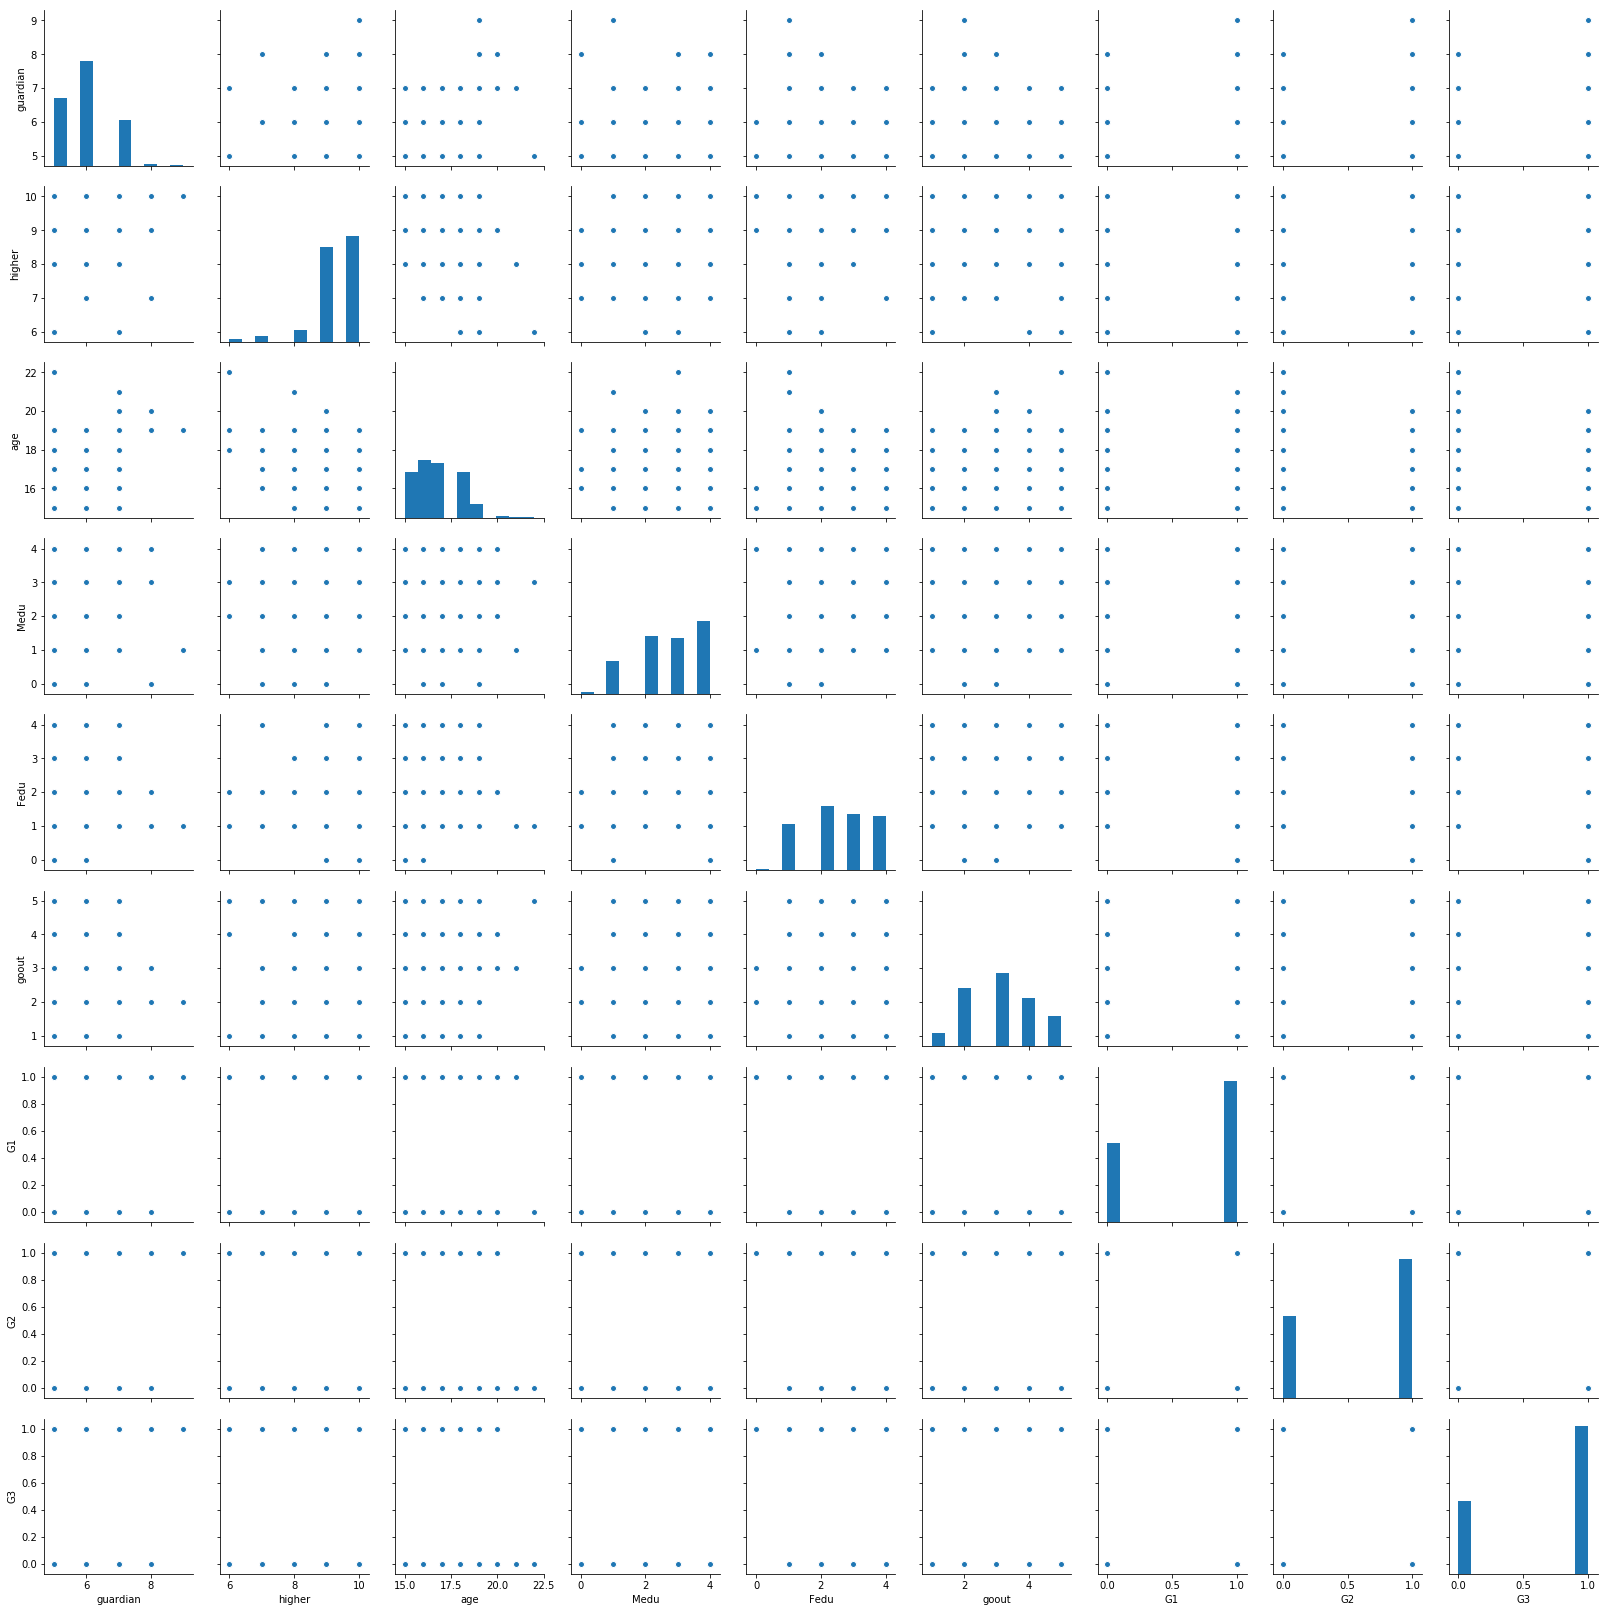

In [274]:
import seaborn as sns
sns.pairplot(stdata2)


## Question 16

*Repeat 12,13 questions with the remaining independent variables from the above question.*

#### Answer:

In [275]:
from sklearn.model_selection import train_test_split
y = stdata2['G3']
X = stdata2.drop(['G3'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
y_train = y_train.reshape(len(y_train),1)
y_test = y_test.reshape(len(y_test),1)

In [276]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred_tr = model.predict(X_train)
y_predict = model.predict(X_test)
model_score = model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_predict))

0.9113924050632911
[[21  3]
 [ 4 51]]


In [285]:
print('For Test Sets: ','f1 score: ', metrics.f1_score(y_predict, y_test), 
      'accuracy score: ', metrics.accuracy_score(y_predict, y_test))

For Test Sets:  f1 score:  0.7804878048780488 accuracy score:  0.6582278481012658


In [286]:
print('For Training Sets: ','f1 score: ', metrics.f1_score(y_pred_tr, y_train), 
      'accuracy score: ', metrics.accuracy_score(y_pred_tr, y_train))

For Training Sets:  f1 score:  0.801635991820041 accuracy score:  0.6930379746835443


## Question 17 - Analysis on G1 and G2 independent variables

*Change the feature set by removing G1 and G2 attributes and Print Accuracy and F1 sore of Training and Test sets.*

#### Answer:

In [279]:
y = stdata2['G3']
X = stdata2.drop(['G3', 'G2','G1'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
y_train = y_train.reshape(len(y_train),1)
y_test = y_test.reshape(len(y_test),1)

In [280]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred_tr = model.predict(X_train)
y_predict = model.predict(X_test)
model_score = model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_predict))

0.6582278481012658
[[ 4 20]
 [ 7 48]]


In [287]:
print('For Test Sets: ','f1 score: ', metrics.f1_score(y_predict, y_test), 
      'accuracy score: ', metrics.accuracy_score(y_predict, y_test))

For Test Sets:  f1 score:  0.7804878048780488 accuracy score:  0.6582278481012658


In [288]:
print('For Training Sets: ','f1 score: ', metrics.f1_score(y_pred_tr, y_train), 
      'accuracy score: ', metrics.accuracy_score(y_pred_tr, y_train))

For Training Sets:  f1 score:  0.801635991820041 accuracy score:  0.6930379746835443


## Question 18

*In one or two sentences give reasoning about how G1 and G2 attributes are affecting the Accuracy and F1 scores.*

#### Answer:

In [ ]:
#By removing G1 and G2, the accuracy and F1 score has not changed , therefore G1 and G2 do not have impact on model